## Loading the dataset
After downloading the dataset from http://ufldl.stanford.edu/housenumbers/ in the second variant (32x32 images with a single number centered)

In [1]:
import matplotlib.pyplot as plt
import numpy as np, random

#Read the datasets into memory
from scipy.io import loadmat

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')
train_img, train_lbs = train['X'], train['y']
test_img, test_lbs = test['X'], test['y']

train_img.shape, train_lbs.shape, test_img.shape, test_lbs.shape

((32, 32, 3, 73257), (73257, 1), (32, 32, 3, 26032), (26032, 1))

In [3]:
#reshape the arrays to have the sample number as first index

train_img = np.transpose(train_img,[3,0,1,2])
test_img = np.transpose(test_img,[3,0,1,2])

train_img.shape, train_lbs.shape, test_img.shape, test_lbs.shape

((73257, 32, 32, 3), (73257, 1), (26032, 32, 32, 3), (26032, 1))

## Extract a random validation set from the training set
In this case the size of the validation set is 7% of the training set.  
It is randomly extracted because the order of the images in the training set it's not random: consecutive images are part of the same original image with a complete house number.

In [4]:
#Divide training and validation
#validation set size is 7% of training set
validation_percentage = 0.07
validation_size = int(validation_percentage * train_img.shape[0])
#select the validation set as a random sample from the training set
random.seed(0) #chosen seed so the set is always the same
sample = random.sample(range(train_img.shape[0]), validation_size)
validation_img = train_img[sample,:,:,:]
train_img = np.delete(train_img, sample, 0)
validation_lbs = train_lbs[sample,:]
train_lbs = np.delete(train_lbs, sample, 0)

train_img.shape, validation_img.shape, train_lbs.shape, validation_lbs.shape

((68130, 32, 32, 3), (5127, 32, 32, 3), (68130, 1), (5127, 1))

## Visualize the images

In [5]:
#Function to visualize image with their respective labels
def plot_img(images, labels, images_number=4):
    plt.figure(figsize=(8,8))
    for i in range(images_number**2):
        plt.subplot(images_number, images_number, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i,:,:,:], cmap=plt.cm.binary)
        # The labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(labels[i][0])
    plt.show()

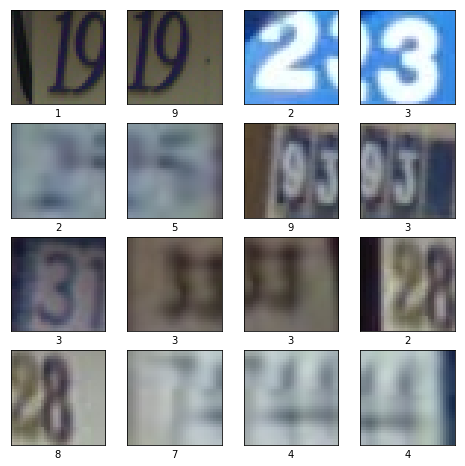

In [6]:
#Check if the training set is divided correctely and print the data
plot_img(train_img, train_lbs)

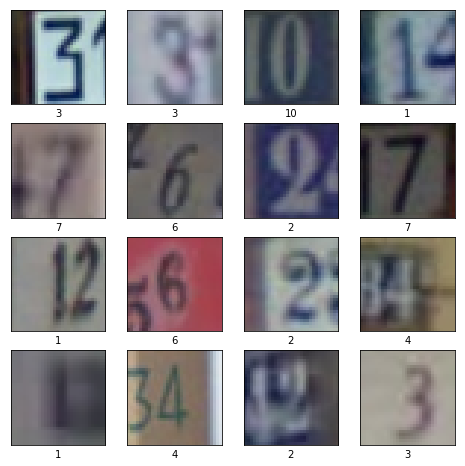

In [7]:
#Check if the validation set is divided correctely and print the data
plot_img(validation_img, validation_lbs)

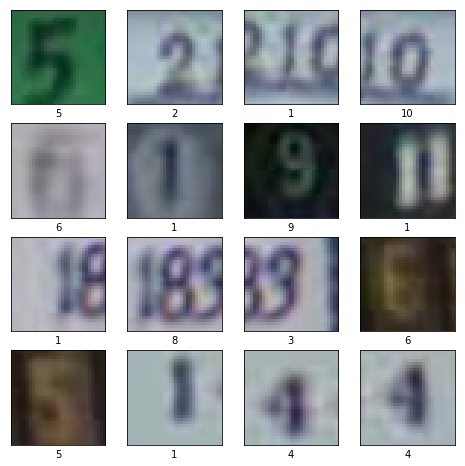

In [8]:
#Check if the test set is divided correctely and print the data
plot_img(test_img, test_lbs)

## Data preprocessing

Two techniques are used in this order on the training set:

- **zero centering**: this is achieved by subctracting the mean of each colour channel across said colour channel.
- **normalization**: divide each colour channel by its standard deviation (calculated after zero centering).

The same techniques are applied also on the validation set and test set but using the same parameters (mean and standard deviation) obtained from the training set.

In [5]:
#cast to float otherwise during mean subtraction floats would be casted to ints
train_img = train_img.astype(float)

#zero center across each colour channel
rmean = np.mean(train_img[:,:,:,0])
bmean = np.mean(train_img[:,:,:,1])
gmean = np.mean(train_img[:,:,:,2])

train_img[:,:,:,0] = train_img[:,:,:,0]-rmean
train_img[:,:,:,1] = train_img[:,:,:,1]-bmean
train_img[:,:,:,2] = train_img[:,:,:,2]-gmean


#normalize by dividing each dimension colour channel by its standard deviation
rstd = np.std(train_img[:,:,:,0])
bstd = np.std(train_img[:,:,:,1])
gstd = np.std(train_img[:,:,:,2])

train_img[:,:,:,0] = train_img[:,:,:,0]/rstd
train_img[:,:,:,1] = train_img[:,:,:,1]/bstd
train_img[:,:,:,2] = train_img[:,:,:,2]/gstd

111.5556675169483 113.11475791914354 120.53552371156245
[[[ -78.55566752  -27.55566752  -92.55566752 ...  -19.55566752
     78.44433248  104.44433248]
  [ -83.11475792  -37.11475792  -59.11475792 ...  -35.11475792
     74.88524208  103.88524208]
  [ -82.53552371  -61.53552371  -10.53552371 ...  -19.53552371
     70.46447629   91.46447629]]

 [[ -96.55566752  -25.55566752  -91.55566752 ...  -17.55566752
     93.44433248  109.44433248]
  [ -90.11475792  -40.11475792  -61.11475792 ...  -31.11475792
     89.88524208  108.88524208]
  [-101.53552371  -54.53552371   -9.53552371 ...  -15.53552371
     85.46447629   96.46447629]]

 [[ -96.55566752  -34.55566752  -86.55566752 ...    2.44433248
    108.44433248  114.44433248]
  [ -96.11475792  -35.11475792  -56.11475792 ...  -12.11475792
    104.88524208  113.88524208]
  [-101.53552371  -64.53552371   -4.53552371 ...    4.46447629
     99.46447629  100.46447629]]

 ...

 [[ -39.55566752  -21.55566752  -46.55566752 ...   88.44433248
    117.444332

In [5]:
#do the same on the validation set and training set
test_img = test_img.astype(float)
validation_img = validation_img.astype(float)

test_img[:,:,:,0] = test_img[:,:,:,0]-rmean
test_img[:,:,:,1] = test_img[:,:,:,1]-bmean
test_img[:,:,:,2] = test_img[:,:,:,2]-gmean

test_img[:,:,:,0] = test_img[:,:,:,0]/rstd
test_img[:,:,:,1] = test_img[:,:,:,1]/bstd
test_img[:,:,:,2] = test_img[:,:,:,2]/gstd

validation_img[:,:,:,0] = validation_img[:,:,:,0]-rmean
validation_img[:,:,:,1] = validation_img[:,:,:,1]-bmean
validation_img[:,:,:,2] = validation_img[:,:,:,2]-gmean

validation_img[:,:,:,0] = validation_img[:,:,:,0]/rstd
validation_img[:,:,:,1] = validation_img[:,:,:,1]/bstd
validation_img[:,:,:,2] = validation_img[:,:,:,2]/gstd


In [10]:
##hyper parameters network structure, batch size, learning rate, drop-out

#do the train
#see what hyperparameters do better on val set
#redo the trainign with the best parameters on val set + train set
#evaluate on training set

#adapt network architecture (try max pool instead of stride or vice versa)